In [1]:
import os
HOME = os.getcwd()
print(HOME)

/Users/zmhickey/TeamTracking


In [2]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.0 CPU
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 319.3/460.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!pip install roboflow

#### train modle 

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=250 imgsz=800 plots=True

In [9]:
WEIGHTS_PATH = f"{HOME}/runs/detect/train/weights/best.pt"

##### create video with 


In [ ]:
%cd {HOME}
#!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=video2.mp4 save=True

!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.40 source=datasets/clipPro.mp4 save=True




#### creating the custom anot

In [ ]:

model = YOLO(WEIGHTS_PATH)

In [ ]:
from typing import Generator

import matplotlib.pyplot as plt
import numpy as np

import cv2

%matplotlib inline 

def generate_frames(video_file: str) -> Generator[np.ndarray, None, None]:
    video = cv2.VideoCapture(video_file)

    while video.isOpened():
        success, frame = video.read()

        if not success:
            break

        yield frame

    video.release()


def plot_image(image: np.ndarray, size: int = 12) -> None:
    plt.figure(figsize=(size, size))
    plt.imshow(image[...,::-1])
    plt.show()

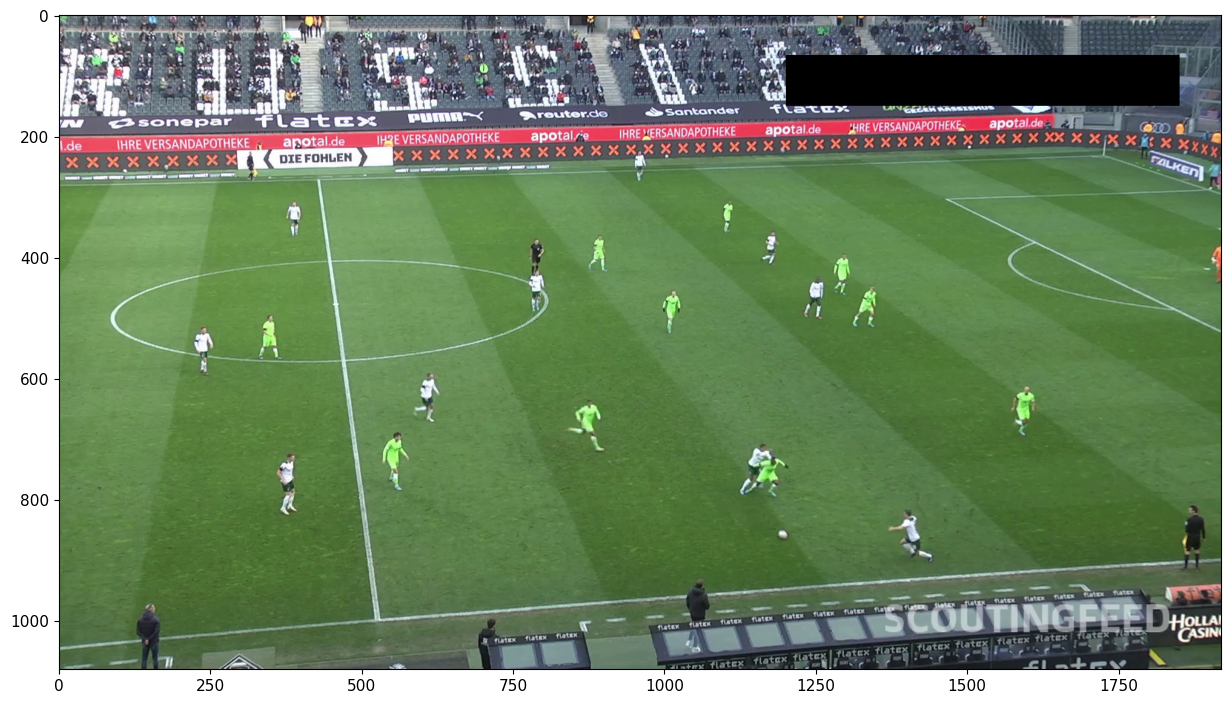

In [ ]:
SOURCE_VIDEO_PATH = f"{HOME}/datasets/clipPro.mp4"
frame_iterator = iter(generate_frames(video_file=SOURCE_VIDEO_PATH))
frame = next(frame_iterator)
plot_image(frame, 15)

In [ ]:
model.names

{0: 'Ball',
 1: 'Corner',
 2: 'GoalKeeper',
 3: 'Referee',
 4: 'TEAM 1',
 5: 'TEAM 2',
 6: 'goal'}

### custom anot